In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Função para extrair dados da tabela
def extrair_dados(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontrar a tabela com id 'pos_onglet'
    table = soup.find('table', id='pos_onglet')
    data = []
    if table:
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            data.append([col.text.strip() for col in cols])
    return data

# URL base
url_base = "http://www.cazy.org/search?page=recherche&recherche=&tag=12&debut_ligand="

# Lista para armazenar os dados
todos_os_dados = []

# Loop para as diferentes páginas
for page in range(0, 11700, 100):  # Começa em 0 e vai até 11700 com intervalo de 100
    url = url_base + str(page)
    dados = extrair_dados(url)
    todos_os_dados.extend(dados)

# Criar o DataFrame sem especificar colunas
df = pd.DataFrame(todos_os_dados)

# Exibir as primeiras linhas do DataFrame
print(df.head())

In [12]:
cazy_df = df.iloc[1:, :7]

In [9]:
cazy_df.to_csv('/home/douglas/cazy_df.csv')

In [1]:
#Read
import pandas as pd
cazy_df = pd.read_csv('/home/douglas/cazy_df.csv')
cazy_df.columns = cazy_df.iloc[0]  # Define a primeira linha como cabeçalho
cazy_df = cazy_df[1:].reset_index(drop=True)
cazy_df = cazy_df[~cazy_df.iloc[:, 1].str.contains('page précédente', na=False)]

In [32]:
#Read CSV new
import pandas as pd
piranose_df = pd.read_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_new.csv")

In [33]:
#Link

#Transformando a coluna 'sugar' para comparação
# Mantendo apenas os 4 primeiros caracteres e convertendo para letras minúsculas
piranose_df['sugar_entry'] = piranose_df['sugar'].str[:4].str.lower()
cazy_df['PDB/3D'] = cazy_df['PDB/3D'].str[:4].str.lower()

# Selecionando as colunas necessárias para o merge
cazy_subset = cazy_df[['PDB/3D', 'Protein Name', 'Family']]

# Realizando o merge para adicionar a classificação ao piranose_df
piranose_df = piranose_df.merge(
    cazy_subset,
    how='left',  # Mantém todas as linhas do piranose_df
    left_on='sugar_entry',
    right_on='PDB/3D'
)

# Removendo a coluna extra 'PDB/3D' (opcional)
piranose_df = piranose_df.drop(columns=['PDB/3D'])

# Exibindo o DataFrame final
print(piranose_df)
piranose_clean_df = piranose_df.dropna()


       Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0           sugar  \
0                 0             0             0           0  1uhg_NAG_11983   
1                 1             1             1           1   6zho_GLC_4663   
2                 2             2             2           2   6xql_GLC_2019   
3                 3             3             3           3  1hjs_NAG_10514   
4                 4             4             4           4   7vin_NAG_4824   
...             ...           ...           ...         ...             ...   
34742         34702         34702         34702       34702   3gdn_MAN_8064   
34743         34703         34703         34703       34703   6ze7_NAG_9355   
34744         34704         34704         34704       34704   1o8a_NAG_4689   
34745         34705         34705         34705       34705  4wk0_NAG_13481   
34746         34706         34706         34706       34706  4x83_NAG_24226   

       time   puck.qx   puck.qy   puck.qz  puck.phi

In [34]:
piranose_clean_df.to_csv("/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_clean_family_and_protein_name_entry_name.csv")

In [ ]:
#Link

#Transformando a coluna 'sugar' para comparação
# Mantendo apenas os 4 primeiros caracteres e convertendo para letras minúsculas
piranose_entries = piranose_df['sugar'].str[:4].str.lower()
cazy_entries = cazy_df['PDB/3D'].str[:4].str.lower()

isin = piranose_entries.isin(cazy_entries)

print(isin.sum())


In [ ]:
cazy_df = cazy_df[cazy_df.iloc[:, 1].notna()]
cazy_df.to_csv('/home/douglas/cazy_df_sla.csv')
#cazy_df = cazy_df[cazy_df.iloc[:, 2] <= 2.0]

In [2]:
import pandas as pd

df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_new.csv')
df = df.iloc[:, 4:]

df.to_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_new_clean.csv')

In [1]:
import pandas as pd

df = pd.read_csv('/home/douglas/carboanalysis/carboanalysis/pdb/dataframes/puckering/piranoses_clean_family_and_protein_name_entry_name.csv')
df = df.iloc[:, 4:]
# Remover todos os números da coluna
df['Family'] = df['Family'].str.replace('\d+', '', regex=True)

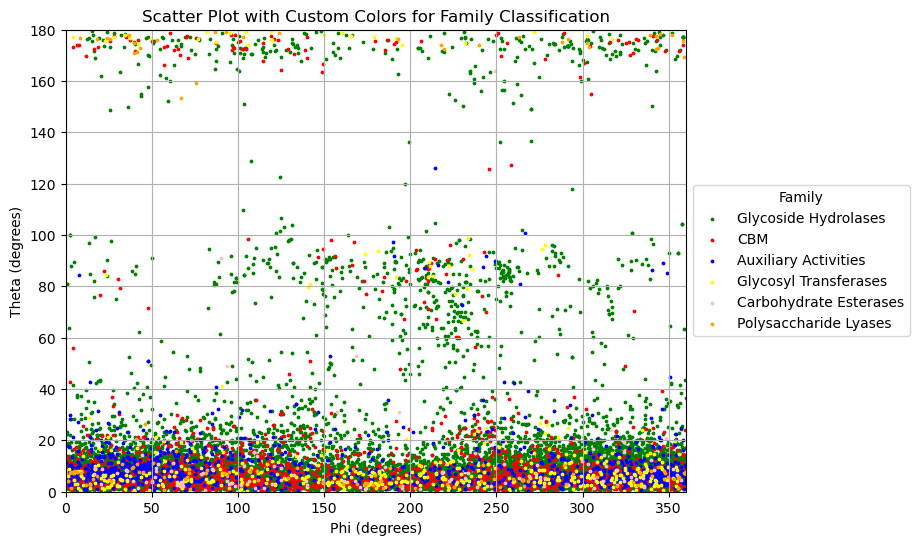

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))

# Dicionário para mapear as cores
color_dict = {
    'GH': 'green',
    'CBM': 'red',
    'AA': 'blue',
    'GT': 'yellow',
    'CE': 'pink',
    'PL': 'orange'
}

# Dicionário para mapear abreviações para nomes completos

full_names_dict = {
    'GH': 'Glycoside Hydrolases',
    'CBM': 'CBM',
    'AA': 'Auxiliary Activities',
    'GT': 'Glycosyl Transferases',
    'CE': 'Carbohydrate Esterases',
    'PL': 'Polysaccharide Lyases'
}

# Plotar cada classificação com sua cor correspondente
for family in color_dict.keys():
    subset = df[df['Family'] == family]
    plt.scatter(
        subset['puck.phi_graus'], 
        subset['puck.theta_graus'], 
        color=color_dict[family], 
        label=full_names_dict[family], 
        s=3  # Tamanho dos pontos
    )

# Configurar os eixos
plt.xlim([0, 360])
plt.ylim([0, 180])
plt.xlabel('Phi (degrees)')
plt.ylabel('Theta (degrees)')

# Adicionar a legenda
plt.legend(title='Family', loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar o gráfico
plt.title('Scatter Plot with Custom Colors for Family Classification')
plt.grid(True)  # Adicionar grade para melhor visualização
plt.show()


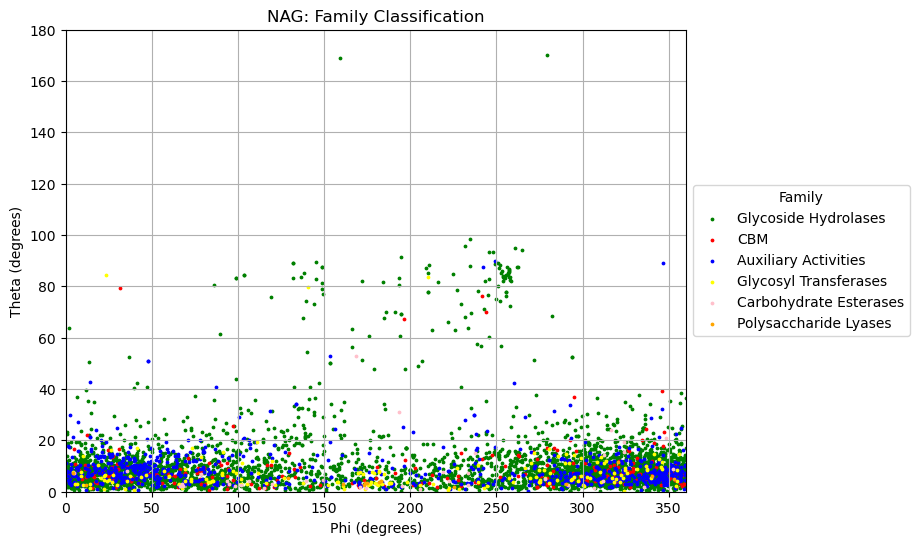

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

#NAG

mon_df = df[df['sugar'].str.contains('NAG', na=False)]

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))

# Dicionário para mapear as cores
color_dict = {
    'GH': 'green',
    'CBM': 'red',
    'AA': 'blue',
    'GT': 'yellow',
    'CE': 'pink',
    'PL': 'orange'
}

# Dicionário para mapear abreviações para nomes completos

full_names_dict = {
    'GH': 'Glycoside Hydrolases',
    'CBM': 'CBM',
    'AA': 'Auxiliary Activities',
    'GT': 'Glycosyl Transferases',
    'CE': 'Carbohydrate Esterases',
    'PL': 'Polysaccharide Lyases'
}

# Plotar cada classificação com sua cor correspondente
for family in color_dict.keys():
    subset = mon_df[mon_df['Family'] == family]
    plt.scatter(
        subset['puck.phi_graus'], 
        subset['puck.theta_graus'], 
        color=color_dict[family], 
        label=full_names_dict[family], 
        s=3  # Tamanho dos pontos
    )

# Configurar os eixos
plt.xlim([0, 360])
plt.ylim([0, 180])
plt.xlabel('Phi (degrees)')
plt.ylabel('Theta (degrees)')

# Adicionar a legenda
plt.legend(title='Family', loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar o gráfico
plt.title('NAG: Family Classification')
plt.grid(True)  # Adicionar grade para melhor visualização
plt.show()


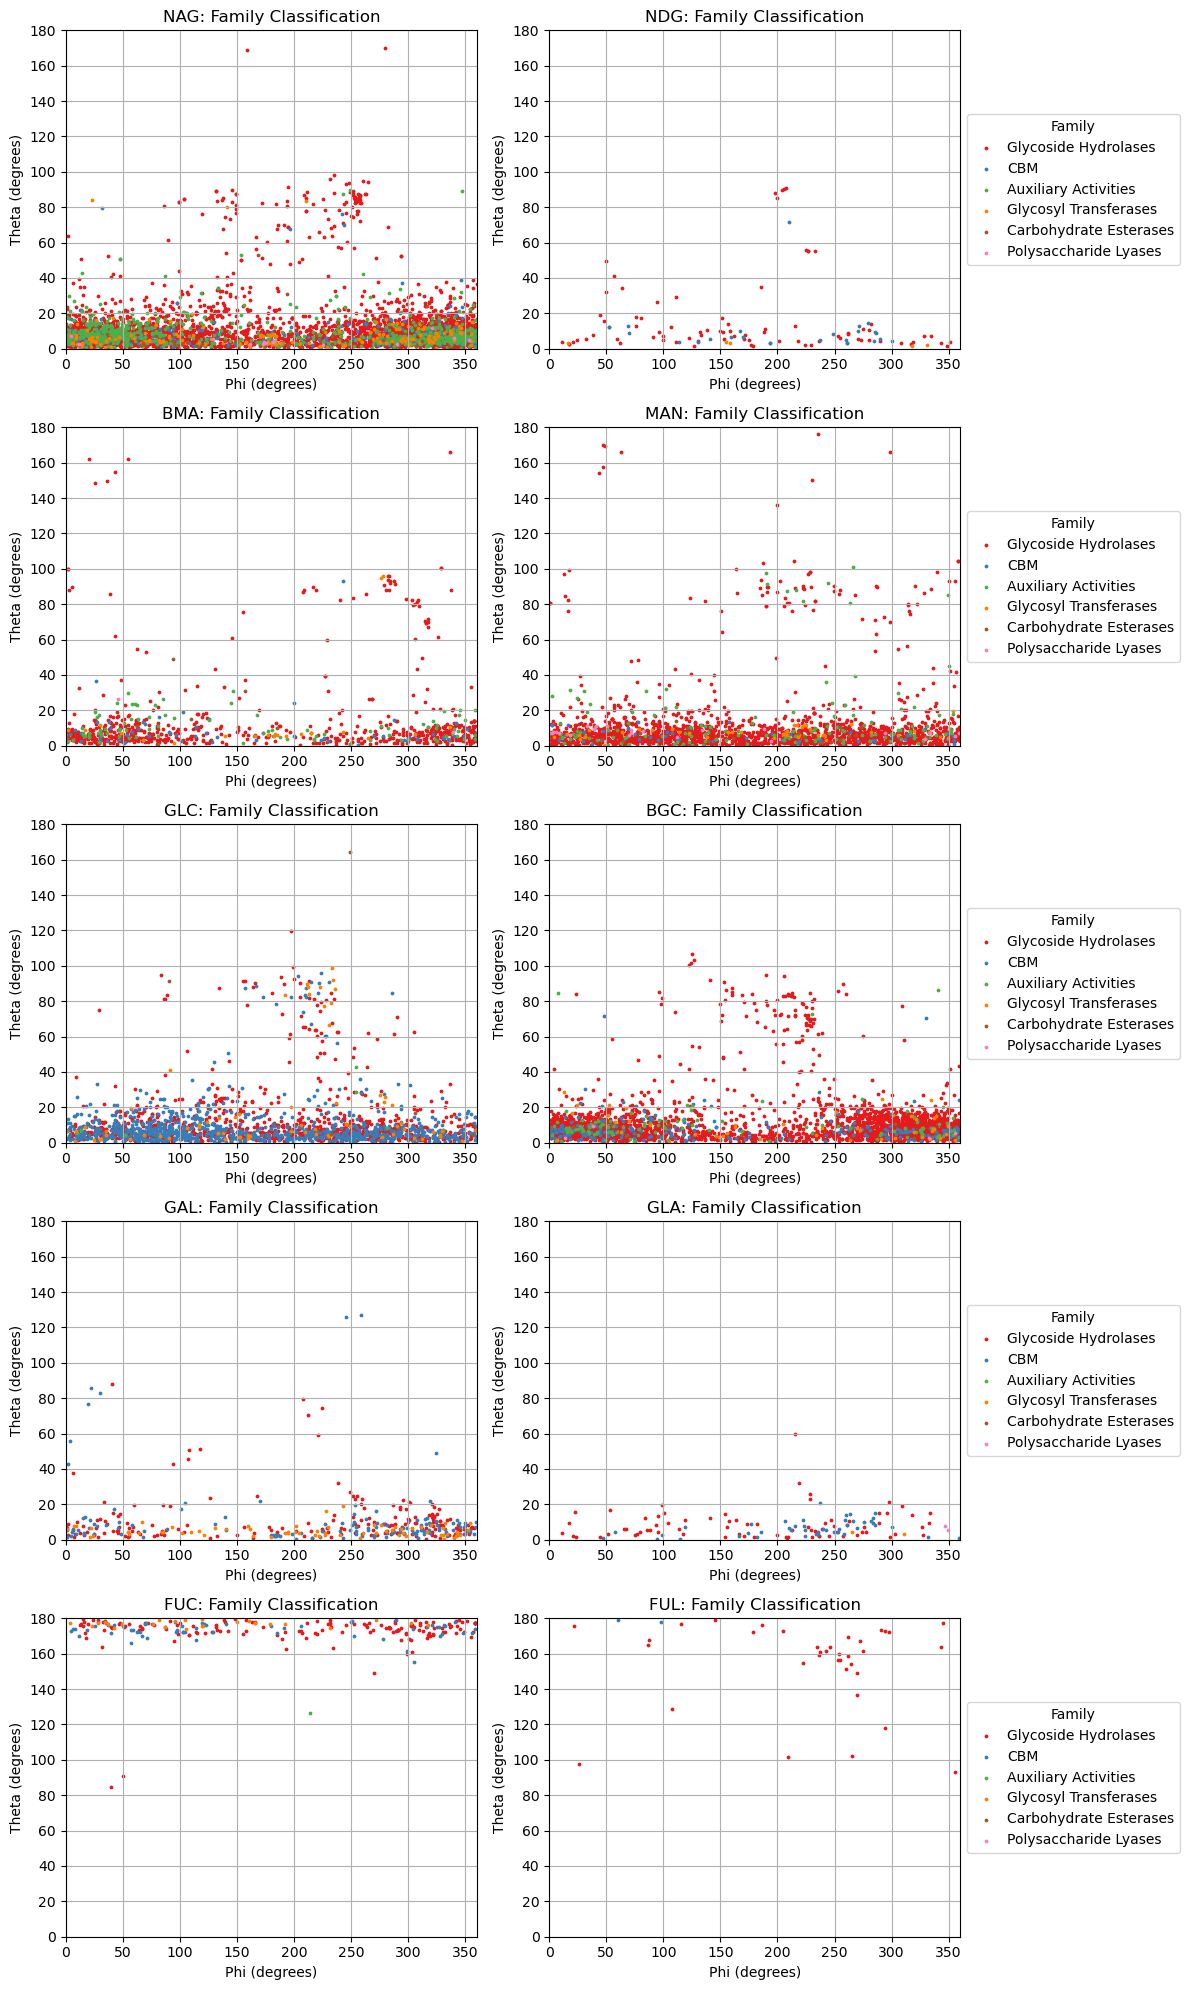

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df é o seu DataFrame com os dados

# Lista de açúcares que você quer analisar
sugars = ['NAG', 'NDG', 'BMA', 'MAN', 'GLC', 'BGC', 'GAL', 'GLA', 'FUC', 'FUL']

# Criar uma figura com subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 20))  # 5 linhas e 2 colunas
axs = axs.flatten() 
 # Facilita o acesso aos eixos

# Dicionário para mapear as cores
color_dict = {
    'GH': '#e41a1c',
    'CBM': '#377eb8',
    'AA': '#4daf4a',
    'GT': '#ff7f00',
    'CE': '#a65628',
    'PL': '#f781bf'
}

# Dicionário para mapear abreviações para nomes completos
full_names_dict = {
    'GH': 'Glycoside Hydrolases',
    'CBM': 'CBM',
    'AA': 'Auxiliary Activities',
    'GT': 'Glycosyl Transferases',
    'CE': 'Carbohydrate Esterases',
    'PL': 'Polysaccharide Lyases'
}

# Loop através dos açúcares e plotar em cada subplot
for i, sugar in enumerate(sugars):
    mon_df = df[df['sugar'].str.contains(sugar, na=False)]
    
    # Armazenar handles de legenda
    legend_handles = []
    
    # Plotar cada classificação com sua cor correspondente
    for family in color_dict.keys():
        subset = mon_df[mon_df['Family'] == family]
        scatter = axs[i].scatter(
            subset['puck.phi_graus'], 
            subset['puck.theta_graus'], 
            color=color_dict[family], 
            s=3,  # Tamanho dos pontos
            label=full_names_dict[family]  # Definindo rótulo
        )
        legend_handles.append(scatter)  # Adicionar o artista à lista de handles
    
    # Configurar os eixos
    axs[i].set_xlim([0, 360])
    axs[i].set_ylim([0, 180])
    axs[i].set_xlabel('Phi (degrees)')
    axs[i].set_ylabel('Theta (degrees)')
    
    # Adicionar o título para cada gráfico
    axs[i].set_title(f'{sugar}: Family Classification')
    axs[i].grid(True)  # Adicionar grade para melhor visualização

    # Adicionar a legenda apenas nos gráficos da segunda coluna
    if i % 2 == 1:  # Verifica se o índice é ímpar (segunda coluna)
        axs[i].legend(title='Family', loc='center left', bbox_to_anchor=(1, 0.5), handletextpad=0.5)

# Ajustar o layout
plt.tight_layout()
plt.show()
